# Part 2 - Regression

## Simple linear regression

### Get the dataset

The data set we will be using is `Salary_Data.csv`

### Intuition

$$y = b_0 + b_{1}x_{1}$$

The simplest way of calculating the regression line is to minimise the sum of the squared difference between data points and the mean:

$$\sum_{i=1} (y_i - \hat{y})^2$$

### Pre-process data

In [6]:
# Import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Salary_Data.csv')
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

# Split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Fitting simple linear regression to the training set

In [43]:
# fitting Simple Linear Regression to the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Predicting the test set results

In [44]:
y_pred = regressor.predict(X_test)

### Visualising the training set results

No handles with labels found to put in legend.


Text(0, 0.5, 'Salary /$')

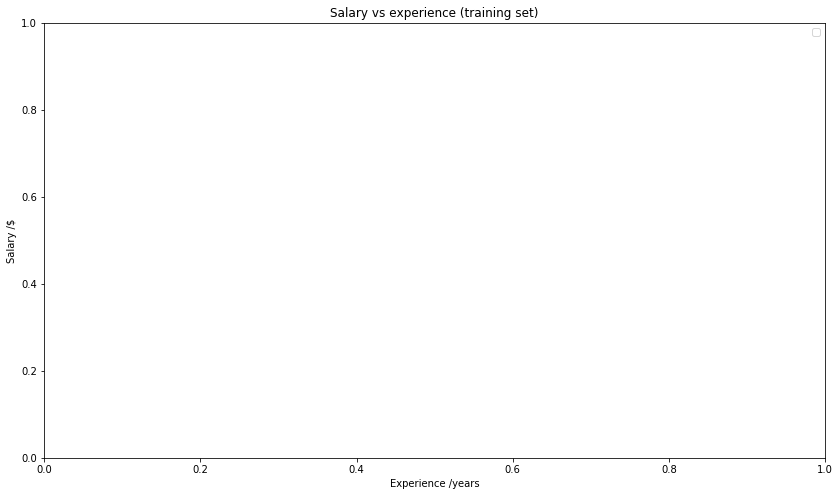

In [47]:
# Visulaising the training set results
import seaborn as sns
plt.figure(figsize=(14,8))
#sns.scatterplot(x=X_train.values.flatten(), y=y_train, color='red')
#sns.lineplot(x=X_train.values.flatten(), y=regressor.predict(X_train), color='blue')
plt.title("Salary vs experience (training set)")
plt.legend()
plt.xlabel("Experience /years")
plt.ylabel("Salary /$")



At this point I got a bit bored so skipped to the next section

## Multi linear regression

### Dataset and business problem

The dataset we are working with is `50_Startups.csv`.

### Intuition

$$y = b_0 + \sum_{i}b_{i}x_{i}$$

#### Assumptions of a linear regression model

1. Linearity
2. Homoscedasticity
3. Multivariate normality
4. Independence of errors
5. Lack of multicollinearity

#### Dummy variables

Note that when you have a categorical variable, you introduce dummy variables to make them into numbers that can be used by ML models. But you must omit one dummy variable in the set as otherwise you would introduce an extra degree of freedom.

*Do not fall into the dummy variable trap*

#### P-value

The p-value is the probability of getting a sample like ours, or more extreme than ours *if* the null hypothesis is true. We assume the null hypothesis is true and then determine how "strange" or sample really is. If it's not that strange (a large p-value) then we don't change our minds about the null hypothesis. As the p-value gets smaller, we start wondering if the null really is true and well maybe we should change our minds (and reject the null hypothesis).

A little more detail: A small p-value indicates that by pure luck alone, it would be unlikely to get a sample like the one we have if the null hypothesis is true. If this is small enough we start thinking that maybe we aren’t super lucky and instead our assumption about the null being true is wrong. Thats why we reject with a small p-value.

#### Building a model

Five methods of building models:

1. All-in
2. Backward elimination
3. Forward selection
4. Bidirectional elimination
5. Score comparison

Note 2, 3, and 4 are examples of *stepwise regression* models. Though often people by default imply that stepwise direction is bidirectional elimination.

##### Backward elimination

1. Select a significance level to stay in the model (e.g. $\alpha = 0.05$)
2. Fit the full model with all possible predictors
3. Consider the predictor with the *highest* p-vale. if $P > \alpha$ go to 4, else end.
4. Remove the predictor
5. Fit model without this variable

Repeat steps 3-5.

##### Forward elimination

1. Select a significance level to enter in the model (e.g. $\alpha = 0.05$)
2. Fit all simple regression models $y ~ x_n$ and select the one with the lowest P-value
3. Keep this variable and fit all possible models with one extra predictor added to the one you already have
4. Consider the predictor with the loewst p-value, if $P<\alpha$, go to 3, else end, keeping the previous model

##### Bidirectional elimination

1. Select a significance level to enter and to stay in the model (e.g. $\alpha_{enter} = 0.05$, $\alpha_{stay}=0.05)
2. 
